# Tugas Besar II4042 Kecerdasan Buatan untuk Bisnis

# Pendahuluan

# Lihat Isi Data

In [85]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss 

In [86]:
df = pd.read_csv('data/heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [87]:
# get column names
col_names = df.columns
col_names

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [88]:
# get column data types
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [89]:
# get number of rows and columns
df.shape

(246022, 40)

In [90]:
# get a statistical summary of the data
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [91]:
# check for any null columns
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

Since there are no empty rows in the dataset, we don't have to deal with any missing values.

# Exploratory Data Analysis

In [92]:
# get categorical columns and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [93]:
cat_cols

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [94]:
# removing certain cols that aren't related to visualize
remove_from_cat_cols = [
 'State',
 'LastCheckupTime',
 'RemovedTeeth',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos'
]

viz_cols = [val for val in cat_cols if val not in remove_from_cat_cols]
viz_cols

['Sex',
 'GeneralHealth',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


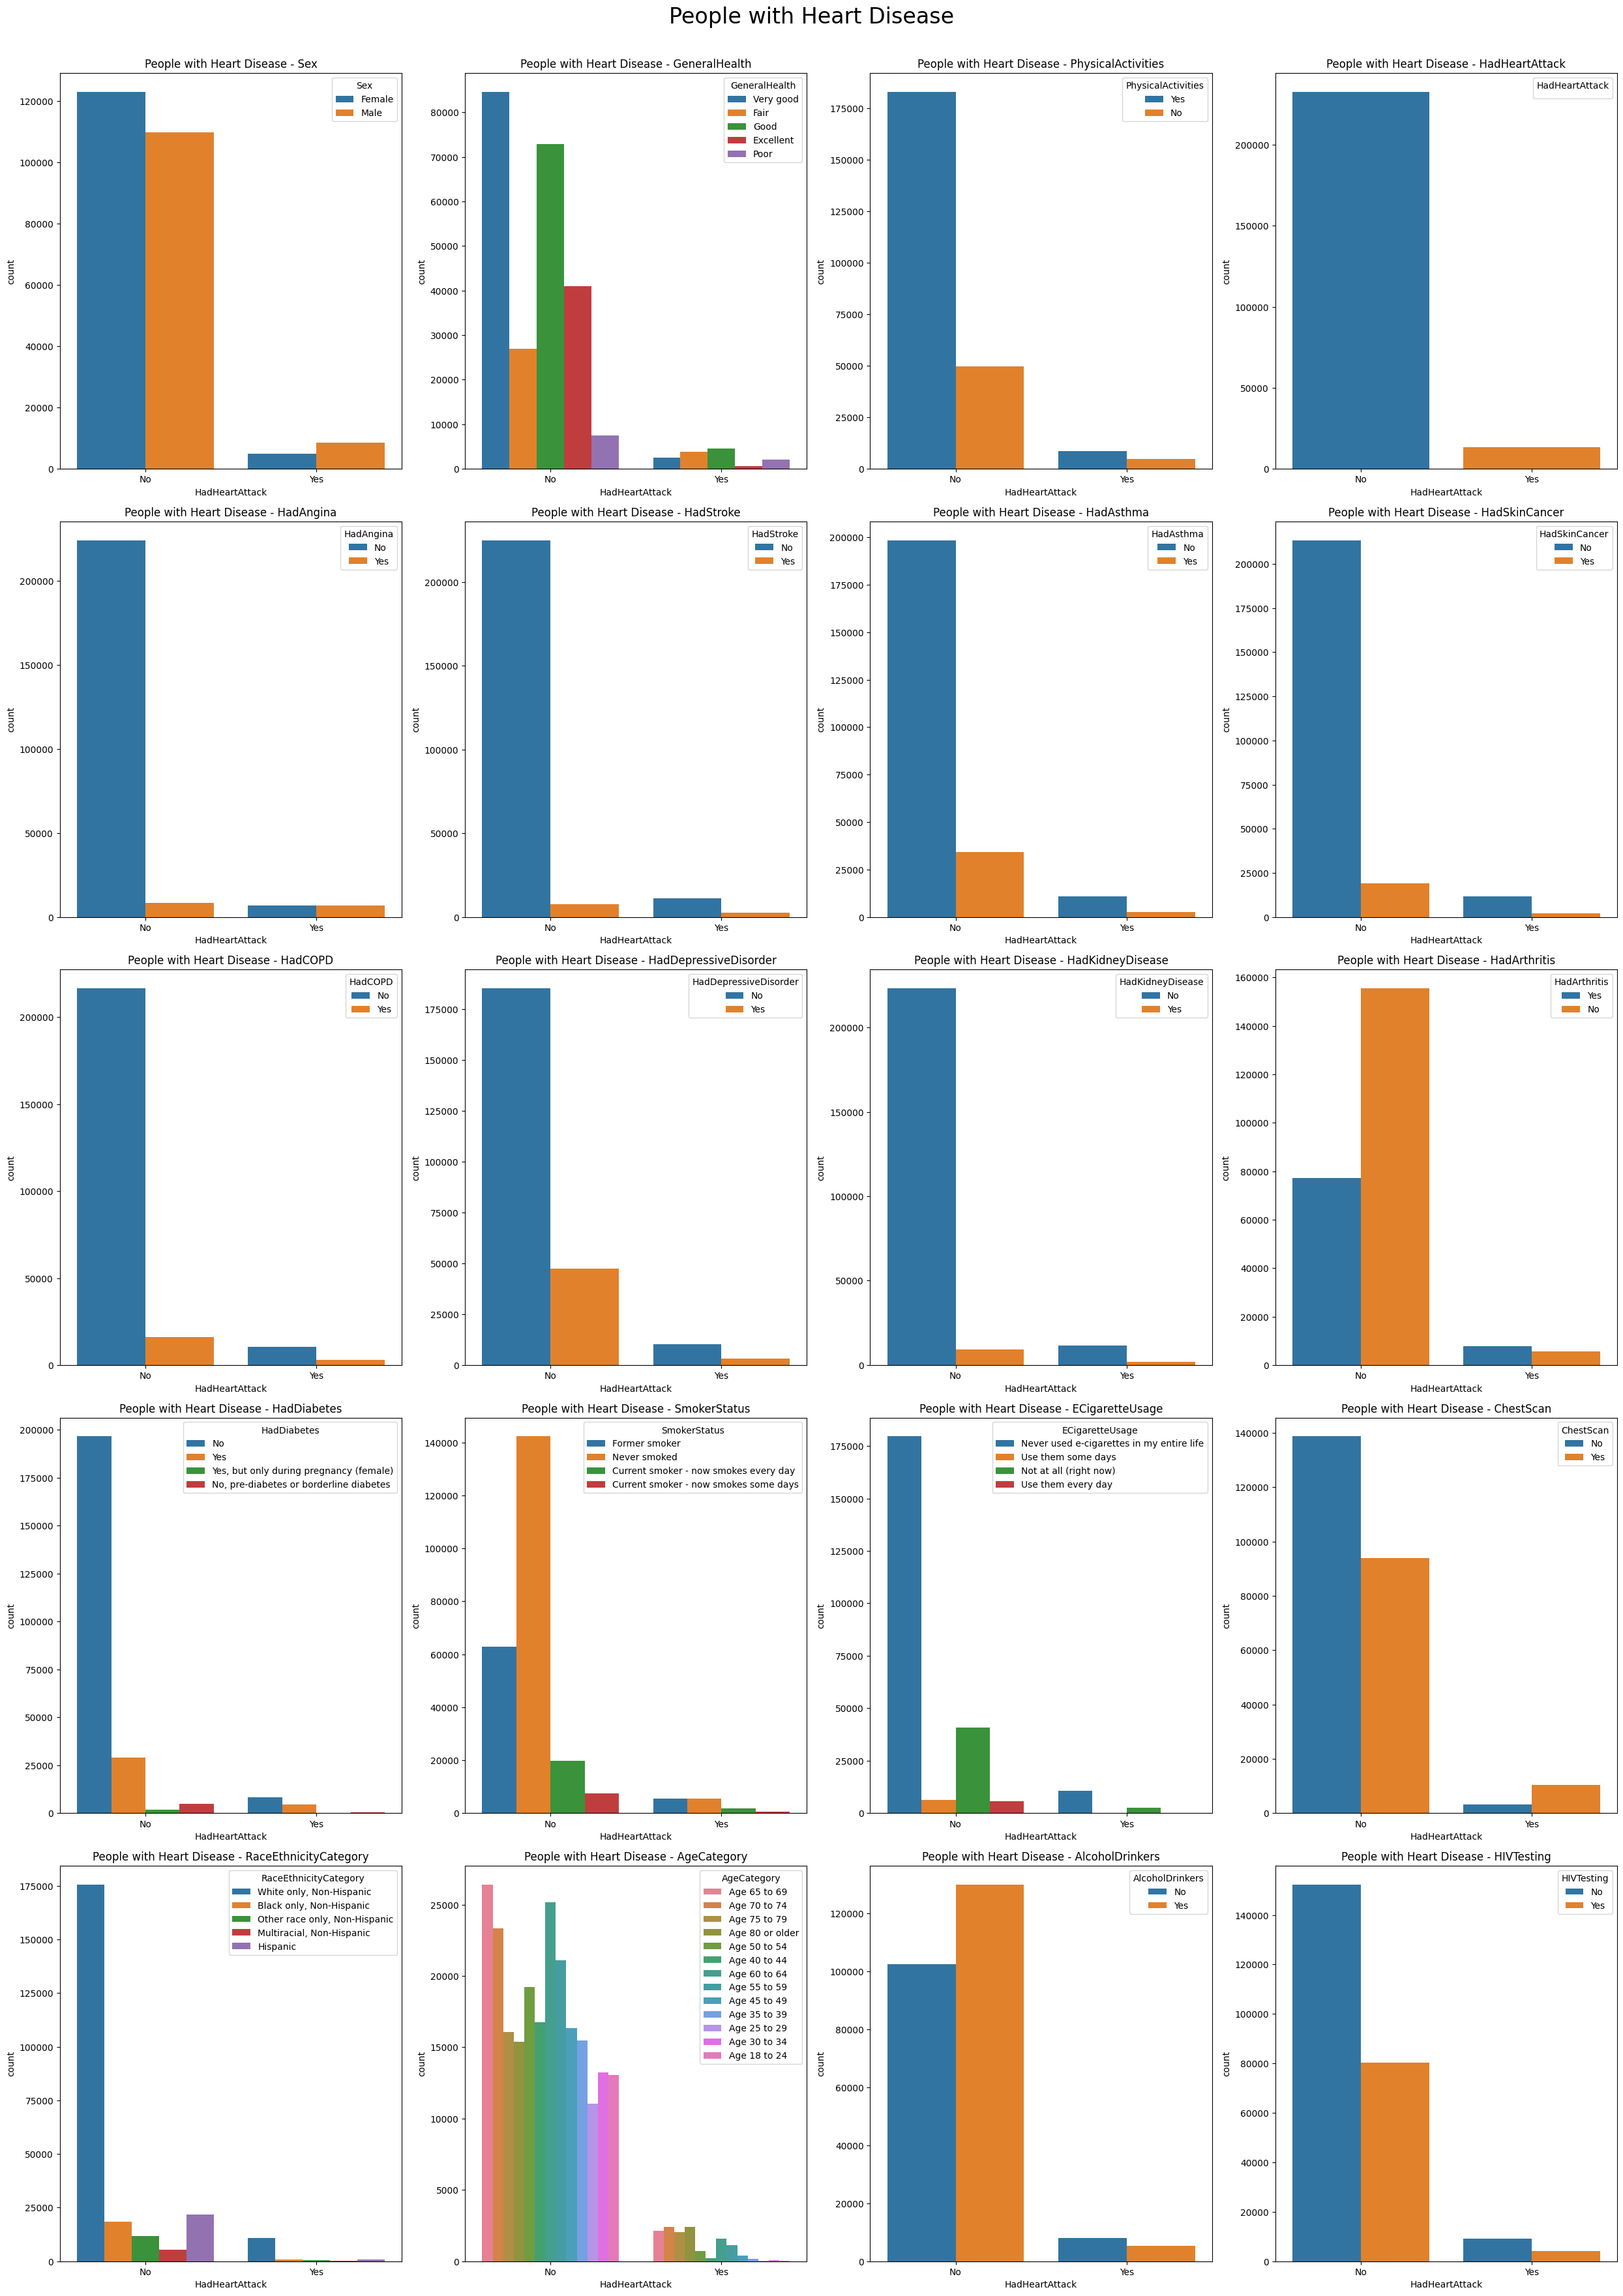

In [95]:
# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 35))
fig.suptitle("People with Heart Disease", y=1.005, fontsize=24)

# Iterate over columns and create countplots
for i, col in enumerate(viz_cols):
    ax = axes[i // 4, i % 4]
    sns.countplot(data=df, x='HadHeartAttack', hue=col, ax=ax)
    ax.legend(title=col)
    ax.set_title(f'People with Heart Disease - {col}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Splitting the Data

In [96]:
from sklearn.model_selection import train_test_split

X = df.drop(['State', 'HadHeartAttack'], axis=1)
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [97]:
X_train.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
108770,Male,Very good,0.0,1.0,Within past 2 years (1 year but less than 2 ye...,Yes,9.0,None of them,No,No,...,1.78,65.77,20.81,Yes,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No
139888,Male,Very good,7.0,1.0,Within past year (anytime less than 12 months ...,Yes,3.0,1 to 5,No,No,...,1.93,99.79,26.78,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
78834,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,All,No,No,...,1.73,86.18,28.89,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
204500,Female,Very good,1.0,28.0,Within past year (anytime less than 12 months ...,No,5.0,All,No,No,...,1.75,108.86,35.44,No,Yes,Yes,No,"Yes, received Tdap",Yes,No
169662,Male,Very good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,Yes,Yes,...,1.78,99.79,31.57,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...


In [98]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (196817, 38)
X_test shape: (49205, 38)


# Encoding the Data

In [99]:
mapping = {'Yes': 1, 'No': 0}
questions_penyakit = X_train.filter(like='Had', axis=1)

for col in questions_penyakit.columns:
    X_train[col] = X_train[col].map(mapping).fillna(-1)
    X_test[col] = X_test[col].map(mapping).fillna(-1)

In [100]:
X_train.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
108770,Male,Very good,0.0,1.0,Within past 2 years (1 year but less than 2 ye...,Yes,9.0,None of them,0,0,...,1.78,65.77,20.81,Yes,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No
139888,Male,Very good,7.0,1.0,Within past year (anytime less than 12 months ...,Yes,3.0,1 to 5,0,0,...,1.93,99.79,26.78,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
78834,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,All,0,0,...,1.73,86.18,28.89,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
204500,Female,Very good,1.0,28.0,Within past year (anytime less than 12 months ...,No,5.0,All,0,0,...,1.75,108.86,35.44,No,Yes,Yes,No,"Yes, received Tdap",Yes,No
169662,Male,Very good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,1,1,...,1.78,99.79,31.57,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...


In [101]:
import category_encoders as ce
ce_columns = ['RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos', 'Sex']

# Create the OneHotEncoder instance
encoder = ce.OneHotEncoder(cols=ce_columns, use_cat_names=True)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data using the fitted encoder
X_test_encoded = encoder.transform(X_test)

In [102]:
X_train = X_train_encoded
X_test = X_test_encoded

In [103]:
# mapping AgeCategory
mapping = {'Age 18 to 24': 1, 'Age 25 to 29': 2, 'Age 30 to 34':3, 'Age 35 to 39':4,
           'Age 40 to 44': 5, 'Age 45 to 49': 6, 'Age 50 to 54':7, 'Age 55 to 59':8,
           'Age 60 to 64':9, 'Age 65 to 69': 10,  'Age 70 to 74':11,  'Age 75 to 79':12,
           'Age 80 or older':13 }
X_train['AgeCategory'] = X_train['AgeCategory'].map(mapping)
X_test['AgeCategory'] = X_test['AgeCategory'].map(mapping)

In [104]:
# mapping ECigaretteUsage
mapping = {'Never used e-cigarettes in my entire life': 4, 'Not at all (right now)': 3,
 'Use them some days':2,  'Use them every day':1}
X_train['ECigaretteUsage'] = X_train['ECigaretteUsage'].map(mapping)
X_test['ECigaretteUsage'] = X_test['ECigaretteUsage'].map(mapping)

In [105]:
# mapping removedTeeth
mapping = {'None of them': 4, '1 to 5': 3, 'All': 1, '6 or more, but not all': 2}
X_train['RemovedTeeth'] = X_train['RemovedTeeth'].map(mapping)
X_test['RemovedTeeth'] = X_test['RemovedTeeth'].map(mapping)

In [106]:
# mapping last checkup time
mapping = {'Within past 2 years (1 year but less than 2 years ago)': 3,
 'Within past year (anytime less than 12 months ago)': 4,
 'Within past 5 years (2 years but less than 5 years ago)': 2,
 '5 or more years ago': 1}
X_train['LastCheckupTime'] = X_train['LastCheckupTime'].map(mapping)
X_test['LastCheckupTime'] = X_test['LastCheckupTime'].map(mapping)

In [107]:
# mapping generalhealth
mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
X_train['GeneralHealth'] = X_train['GeneralHealth'].map(mapping)
X_test['GeneralHealth'] = X_test['GeneralHealth'].map(mapping)

In [108]:
# mapping smoker
mapping = {'Never smoked': 4, 'Former smoker': 3, 'Current smoker - now smokes some days': 2, 'Current smoker - now smokes every day': 1}
X_train['SmokerStatus'] = X_train['SmokerStatus'].map(mapping)
X_test['SmokerStatus'] = X_test['SmokerStatus'].map(mapping)

In [109]:
categorical_columns_with_two_values = []

for column in X_train.columns:
    if X_train[column].nunique() == 2 and X_train[column].dtype == 'object':
        categorical_columns_with_two_values.append(column)

# Display the result
print(categorical_columns_with_two_values)

['PhysicalActivities', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']


In [110]:
mapping = {'Yes': 1, 'No': 0}

for col in categorical_columns_with_two_values:
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [111]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (196817, 48)
X_test shape: (49205, 48)


# See the Most Important Features with Information Gain

In [112]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

HadAngina                                                                      0.048377
PhysicalActivities                                                             0.041122
RaceEthnicityCategory_White only, Non-Hispanic                                 0.038281
CovidPos_No                                                                    0.037316
AlcoholDrinkers                                                                0.036188
LastCheckupTime                                                                0.034869
Sex_Female                                                                     0.034488
ChestScan                                                                      0.032723
RemovedTeeth                                                                   0.032694
FluVaxLast12                                                                   0.031731
SmokerStatus                                                                   0.029884
Sex_Male                        

## Selecting the top XX features

In [113]:
sorted_mutual_info = mutual_info.sort_values(ascending=False)

# get the ones with more than 0.001
selected_features = mutual_info[mutual_info > 0.001].index

# Subset your feature matrix with the top 10 columns
X_train_selected = X_train[selected_features]

X_test_selected = X_test[selected_features]

y_train_selected = y_train

# Oversampling and Undersampling WithOut Features Selection

/var/folders/7d/qr1dz2w54rbcrsccct0_dpbm0000gn/T/ipykernel_72444/1604015739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y, palette='deep')


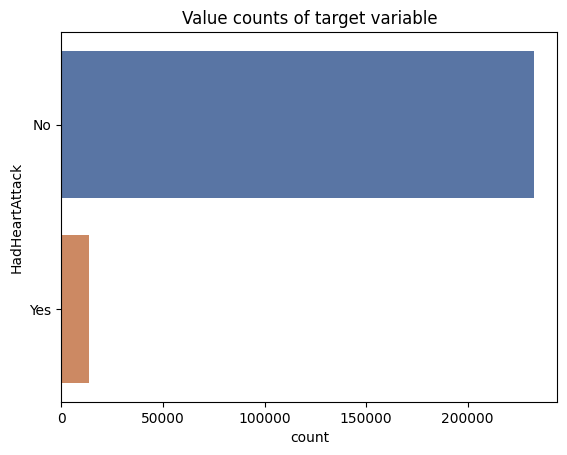

In [114]:
sns.countplot(data=y, palette='deep')
plt.title('Value counts of target variable')
plt.show()

We can see that the data is heavily unbalanced. Thus, we will do oversampling and undersampling.

In [115]:
print("Before OverSampling & Undersampling, counts of label 'Yes': {}".format(sum(y_train == 'Yes'))) 
print("Before OverSampling & Undersampling, counts of label 'No': {} \n".format(sum(y_train == 'No'))) 

# apply oversampling
oversample = RandomOverSampler(sampling_strategy=0.75)
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel()) 
  
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_res == 'Yes'))) 
print("After OverSampling, counts of label 'No': {}\n".format(sum(y_train_res ==  'No'))) 

# apply near miss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train_res, y_train_res.ravel()) 

print("After OverSampling & Undersampling, counts of label 'Yes': {}".format(sum(y_train_miss == 'Yes'))) 
print("After OverSampling & Undersampling, counts of label 'No': {}".format(sum(y_train_miss ==  'No'))) 

Before OverSampling & Undersampling, counts of label 'Yes': 10758
Before OverSampling & Undersampling, counts of label 'No': 186059 

After OverSampling, counts of label 'Yes': 139544
After OverSampling, counts of label 'No': 186059

After OverSampling & Undersampling, counts of label 'Yes': 139544
After OverSampling & Undersampling, counts of label 'No': 139544


In [116]:
X_train = X_train_miss
y_train = y_train_miss

/var/folders/7d/qr1dz2w54rbcrsccct0_dpbm0000gn/T/ipykernel_72444/432316140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_train, palette='deep')


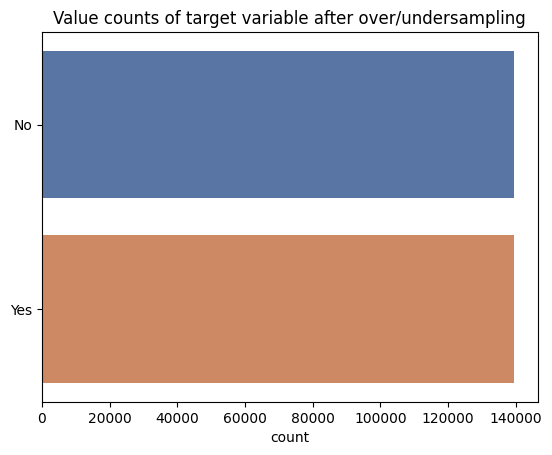

In [117]:
sns.countplot(data=y_train, palette='deep')
plt.title('Value counts of target variable after over/undersampling')
plt.show()

# Oversampling and Undersampling With Features Selection

/var/folders/7d/qr1dz2w54rbcrsccct0_dpbm0000gn/T/ipykernel_72444/1604015739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y, palette='deep')


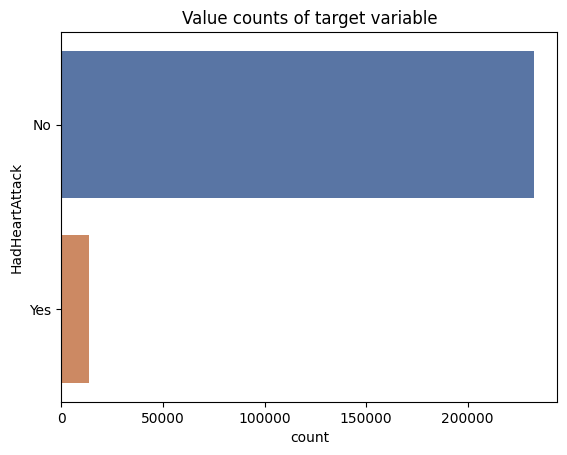

In [118]:
sns.countplot(data=y, palette='deep')
plt.title('Value counts of target variable')
plt.show()

We can see that the data is heavily unbalanced. Thus, we will do oversampling and undersampling.

In [119]:
print("Before OverSampling & Undersampling, counts of label 'Yes': {}".format(sum(y_train_selected == 'Yes'))) 
print("Before OverSampling & Undersampling, counts of label 'No': {} \n".format(sum(y_train_selected == 'No'))) 

# apply oversampling
oversample = RandomOverSampler(sampling_strategy=0.75)
X_train_res, y_train_res = oversample.fit_resample(X_train_selected, y_train_selected.ravel()) 
  
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_res == 'Yes'))) 
print("After OverSampling, counts of label 'No': {}\n".format(sum(y_train_res ==  'No'))) 

# apply near miss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train_res, y_train_res.ravel()) 

print("After OverSampling & Undersampling, counts of label 'Yes': {}".format(sum(y_train_miss == 'Yes'))) 
print("After OverSampling & Undersampling, counts of label 'No': {}".format(sum(y_train_miss ==  'No'))) 

Before OverSampling & Undersampling, counts of label 'Yes': 10758
Before OverSampling & Undersampling, counts of label 'No': 186059 

After OverSampling, counts of label 'Yes': 139544
After OverSampling, counts of label 'No': 186059

After OverSampling & Undersampling, counts of label 'Yes': 139544
After OverSampling & Undersampling, counts of label 'No': 139544


In [120]:
X_train_selected = X_train_miss
y_train_selected = y_train_miss

/var/folders/7d/qr1dz2w54rbcrsccct0_dpbm0000gn/T/ipykernel_72444/432316140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_train, palette='deep')


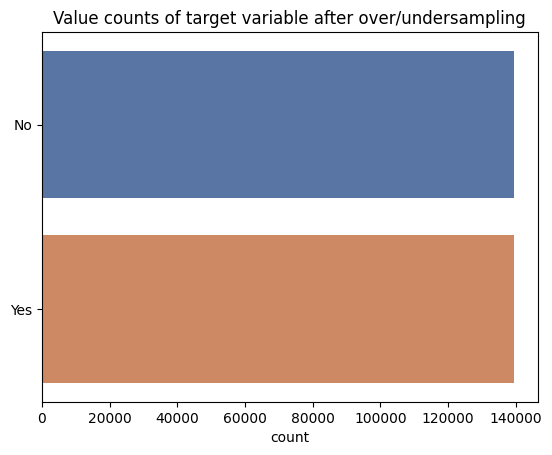

In [121]:
sns.countplot(data=y_train, palette='deep')
plt.title('Value counts of target variable after over/undersampling')
plt.show()

# Model 1 v1: Decision Tree With Features Selection

In [122]:
# importing stuff needed for the decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [123]:
# create the decision tree
clf_f = DecisionTreeClassifier(criterion='entropy', random_state=5)
clf_f = clf_f.fit(X_train_selected,y_train_selected)
clf_y_pred = clf_f.predict(X_test_selected)

## Accuracy Score

In [124]:
print("Accuracy:", metrics.accuracy_score(y_test, clf_y_pred))

Accuracy: 0.9019815059445179


## Compare the train-set and test-set accuracy

In [125]:
clf_y_pred_train = clf_f.predict(X_train_selected)
clf_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [126]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train_selected, clf_y_pred_train))

Training-set accuracy score: 1.0


## Check for overfitting and underfitting

In [127]:
print('Training set score:', clf_f.score(X_train_selected, y_train_selected))
print('Test set score:', clf_f.score(X_test_selected, y_test))

Training set score: 1.0
Test set score: 0.9019815059445179


## Compare Decision Tree with frequents selection model accuracy with null accuracy

In [128]:
y_test.value_counts()

HadHeartAttack
No     46528
Yes     2677
Name: count, dtype: int64

In [129]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


## Confusion Matrix

In [130]:
from sklearn.metrics import confusion_matrix

clf_cm_f = confusion_matrix(y_test, clf_y_pred)

print('Confusion matrix\n\n', clf_cm_f)
print('\nTrue Positives(TP) =', clf_cm_f[0,0])
print('True Negatives(TN) =', clf_cm_f[1,1])
print('False Positives(FP) =', clf_cm_f[0,1])
print('False Negatives(FN) =', clf_cm_f[1,0])

Confusion matrix

 [[43454  3074]
 [ 1749   928]]

True Positives(TP) = 43454
True Negatives(TN) = 928
False Positives(FP) = 3074
False Negatives(FN) = 1749


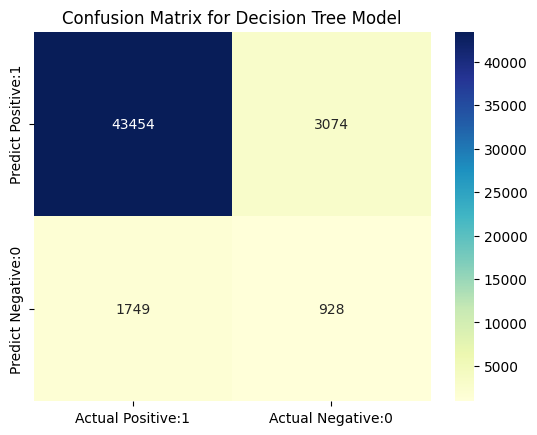

In [131]:
# visualize confusion matrix with seaborn heatmap

clf_cm_matrix = pd.DataFrame(data=clf_cm_f, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(clf_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

## K-Fold cross validation

In [251]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

total_clf_f = 0
count = 0

for i in range(0, 30):
    scores_clf_f = cross_val_score(clf_f, X_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i), scoring='accuracy')
    print('\nCross-validation scores:{}'.format(scores_clf_f))
    total_clf_f += scores_clf_f
    count += 1


Cross-validation scores:[0.97094127 0.97205203 0.97018883 0.97043964 0.97273281 0.9709771
 0.96918557 0.97036798 0.97144188 0.97008026]

Cross-validation scores:[0.97083378 0.9715504  0.97172955 0.97058297 0.97301946 0.97287613
 0.97129958 0.97033215 0.9700086  0.97133438]

Cross-validation scores:[0.970153   0.97244616 0.97112043 0.97194453 0.97058297 0.97026049
 0.97115626 0.97162206 0.97144188 0.97154938]

Cross-validation scores:[0.96997384 0.97058297 0.97126375 0.97219535 0.97212369 0.97090544
 0.97194453 0.97158623 0.97111939 0.97022359]

Cross-validation scores:[0.97316278 0.97065463 0.970153   0.97212369 0.97122792 0.97094127
 0.9714429  0.97187287 0.97004443 0.9709044 ]

Cross-validation scores:[0.97291196 0.97069046 0.97119209 0.97119209 0.97043964 0.97083378
 0.97094127 0.97126375 0.97036692 0.97226602]

Cross-validation scores:[0.9706188  0.97334193 0.97233867 0.9714429  0.97122792 0.97036798
 0.97198036 0.97054714 0.97176437 0.97133438]

Cross-validation scores:[0.9719445

In [262]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(total_clf_f.mean()/count))

Average cross-validation score: 0.9713


## Classification Report

In [264]:
print(metrics.classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

          No       0.96      0.93      0.95     46528
         Yes       0.23      0.34      0.27      2677

    accuracy                           0.90     49205
   macro avg       0.59      0.64      0.61     49205
weighted avg       0.92      0.90      0.91     49205



# Model 1 v2: Decision Tree Without Features Selection

In [133]:
# importing stuff needed for the decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [134]:
# create the decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=5)
clf = clf.fit(X_train,y_train)
clf_y_pred = clf.predict(X_test)

## Accuracy Score

In [137]:
print("Accuracy:", metrics.accuracy_score(y_test, clf_y_pred))

Accuracy: 0.9016766588761305


## Compare the train-set and test-set accuracy

In [138]:
clf_y_pred_train = clf.predict(X_train)
clf_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [139]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, clf_y_pred_train))

Training-set accuracy score: 1.0


## Check for overfitting and underfitting

In [140]:
print('Training set score:', clf.score(X_train, y_train))
print('Test set score:', clf.score(X_test, y_test))

Training set score: 1.0
Test set score: 0.9016766588761305


## Compare Decision Tree without frequents selection model accuracy with null accuracy

In [141]:
y_test.value_counts()

HadHeartAttack
No     46528
Yes     2677
Name: count, dtype: int64

In [142]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


## Confusion Matrix

In [143]:
from sklearn.metrics import confusion_matrix

clf_cm = confusion_matrix(y_test, clf_y_pred)

print('Confusion matrix\n\n', clf_cm)
print('\nTrue Positives(TP) =', clf_cm[0,0])
print('True Negatives(TN) =', clf_cm[1,1])
print('False Positives(FP) =', clf_cm[0,1])
print('False Negatives(FN) =', clf_cm[1,0])

Confusion matrix

 [[43465  3063]
 [ 1775   902]]

True Positives(TP) = 43465
True Negatives(TN) = 902
False Positives(FP) = 3063
False Negatives(FN) = 1775


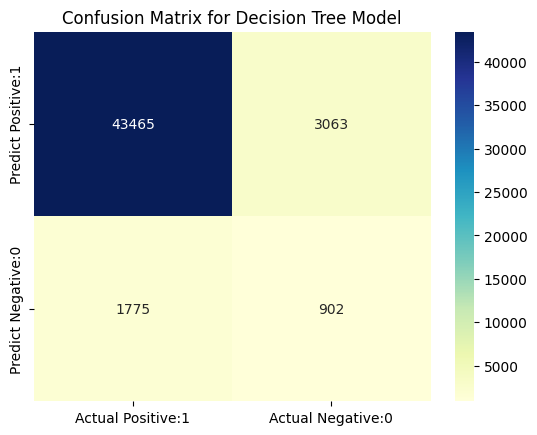

In [144]:
# visualize confusion matrix with seaborn heatmap

clf_cm_matrix = pd.DataFrame(data=clf_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(clf_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

## K-Fold cross validation

In [265]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

total_clf = 0
count = 0

for i in range(0, 30):
    scores_clf = cross_val_score(clf, X_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i), scoring='accuracy')
    print('\nCross-validation scores:{}'.format(scores_clf))
    total_clf += scores_clf
    count += 1


Cross-validation scores:[0.97094127 0.97205203 0.97018883 0.97043964 0.97273281 0.9709771
 0.96918557 0.97036798 0.97144188 0.97008026]

Cross-validation scores:[0.97083378 0.9715504  0.97172955 0.97058297 0.97301946 0.97287613
 0.97129958 0.97033215 0.9700086  0.97133438]

Cross-validation scores:[0.970153   0.97244616 0.97112043 0.97194453 0.97058297 0.97026049
 0.97115626 0.97162206 0.97144188 0.97154938]

Cross-validation scores:[0.96997384 0.97058297 0.97126375 0.97219535 0.97212369 0.97090544
 0.97194453 0.97158623 0.97111939 0.97022359]

Cross-validation scores:[0.97316278 0.97065463 0.970153   0.97212369 0.97122792 0.97094127
 0.9714429  0.97187287 0.97004443 0.9709044 ]

Cross-validation scores:[0.97291196 0.97069046 0.97119209 0.97119209 0.97043964 0.97083378
 0.97094127 0.97126375 0.97036692 0.97226602]

Cross-validation scores:[0.9706188  0.97334193 0.97233867 0.9714429  0.97122792 0.97036798
 0.97198036 0.97054714 0.97176437 0.97133438]

Cross-validation scores:[0.9719445

In [266]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(total_clf.mean()/count))

Average cross-validation score: 0.9713


## Classification report

In [267]:
print(metrics.classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

          No       0.96      0.93      0.95     46528
         Yes       0.23      0.34      0.27      2677

    accuracy                           0.90     49205
   macro avg       0.59      0.64      0.61     49205
weighted avg       0.92      0.90      0.91     49205



# Model 2: Naive Bayes Classifier

In [241]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [242]:
gnb_y_pred = gnb.predict(X_test)
gnb_y_pred

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype='<U3')

## Accuracy score

In [243]:
print("Accuracy:", metrics.accuracy_score(y_test, gnb_y_pred))

Accuracy: 0.7697388476780815


## Compare the train-set and test-set accuracy

In [244]:
gnb_y_pred_train = gnb.predict(X_train)
gnb_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [245]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, gnb_y_pred_train))

Training-set accuracy score: 0.7882065871696382


## Check for overfitting and underfitting

In [246]:
# print the scores on training and test set

print('Training set score:', gnb.score(X_train, y_train))
print('Test set score:', gnb.score(X_test, y_test))

Training set score: 0.7882065871696382
Test set score: 0.7697388476780815


The values are similar, but the test set score is still lower than the training set score.

## Compare GNB model accuracy with null accuracy

In [247]:
y_test.value_counts()

HadHeartAttack
No     46528
Yes     2677
Name: count, dtype: int64

In [248]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


In our GNB model, the null accuracy score is higher than the accuracy score.

## Confusion Matrix

In [249]:
gnb_cm = confusion_matrix(y_test, gnb_y_pred)

print('Confusion matrix\n\n', gnb_cm)
print('\nTrue Positives(TP) =', gnb_cm[0,0])
print('True Negatives(TN) =', gnb_cm[1,1])
print('False Positives(FP) =', gnb_cm[0,1])
print('False Negatives(FN) =', gnb_cm[1,0])

Confusion matrix

 [[35831 10697]
 [  633  2044]]

True Positives(TP) = 35831
True Negatives(TN) = 2044
False Positives(FP) = 10697
False Negatives(FN) = 633


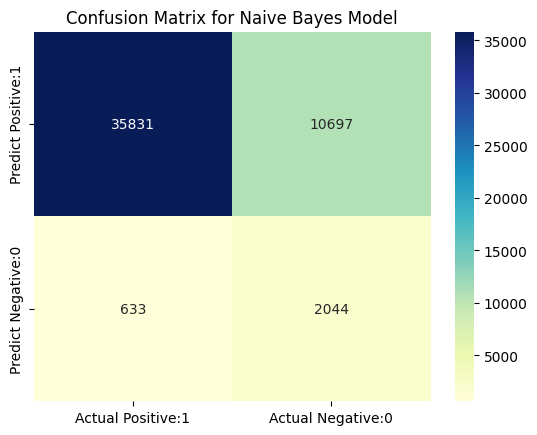

In [250]:
# visualize confusion matrix with seaborn heatmap

gnb_cm_matrix = pd.DataFrame(data=gnb_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(gnb_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

## K-Fold cross validation

In [268]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

total_gnb = 0
count = 0

for i in range(0, 30):
    scores_gnb = cross_val_score(gnb, X_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i), scoring='accuracy')
    print('\nCross-validation scores:{}'.format(scores_gnb))
    total_gnb += scores_gnb
    count += 1


Cross-validation scores:[0.78967358 0.79185926 0.78254327 0.7916801  0.7899244  0.78784621
 0.78791788 0.78641299 0.78407625 0.78898524]

Cross-validation scores:[0.78985274 0.78583969 0.78906446 0.78795371 0.78662797 0.79142929
 0.7899244  0.78580386 0.78866275 0.786262  ]

Cross-validation scores:[0.78816869 0.78687878 0.79175176 0.78766706 0.79150095 0.78383317
 0.78415565 0.79314916 0.78583202 0.78877025]

Cross-validation scores:[0.79110681 0.78831201 0.78723709 0.78773872 0.78798954 0.78942277
 0.79035437 0.7835107  0.79027519 0.78608284]

Cross-validation scores:[0.79225339 0.79117847 0.7857322  0.78874198 0.78956609 0.78566054
 0.786198   0.78741625 0.78593952 0.79106349]

Cross-validation scores:[0.78702211 0.78849117 0.79003189 0.78953026 0.78752374 0.79175176
 0.78512308 0.78816869 0.78378959 0.7918518 ]

Cross-validation scores:[0.78906446 0.78874198 0.78967358 0.78659214 0.79060518 0.79003189
 0.78845534 0.78566054 0.78841192 0.78586785]

Cross-validation scores:[0.788276

In [269]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(total_gnb.mean()/count))

Average cross-validation score: 0.7882


## Classification Report

In [270]:
print(metrics.classification_report(y_test, gnb_y_pred))

              precision    recall  f1-score   support

          No       0.98      0.77      0.86     46528
         Yes       0.16      0.76      0.27      2677

    accuracy                           0.77     49205
   macro avg       0.57      0.77      0.56     49205
weighted avg       0.94      0.77      0.83     49205



# Model 3: Random Forest Algorithm

In [157]:
# modelling
from sklearn.ensemble import RandomForestClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [158]:
rf_y_pred = rf.predict(X_test)

## Accuracy Score

In [159]:
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

Accuracy: 0.9450055888629204


## Compare the train-set and test-set accuracy

In [160]:
rf_y_pred_train = rf.predict(X_train)
rf_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [161]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, rf_y_pred_train))

Training-set accuracy score: 1.0


## Check for overfitting and underfitting

In [162]:
# print the scores on training and test set

print('Training set score:', rf.score(X_train, y_train))
print('Test set score:', rf.score(X_test, y_test))

Training set score: 1.0
Test set score: 0.9450055888629204


The values are similar, but the test set score is still lower than the training set score.

## Compare RF model accuracy with null accuracy

In [163]:
y_test.value_counts()

HadHeartAttack
No     46528
Yes     2677
Name: count, dtype: int64

In [164]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


In our rf model, the null accuracy score is MIRIP GATAU ARTINYS than the accuracy score.

## Confusion Matrix

In [165]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

print('Confusion matrix\n\n', rf_cm)
print('\nTrue Positives(TP) =', rf_cm[0,0])
print('True Negatives(TN) =', rf_cm[1,1])
print('False Positives(FP) =', rf_cm[0,1])
print('False Negatives(FN) =', rf_cm[1,0])

Confusion matrix

 [[45516  1012]
 [ 1694   983]]

True Positives(TP) = 45516
True Negatives(TN) = 983
False Positives(FP) = 1012
False Negatives(FN) = 1694


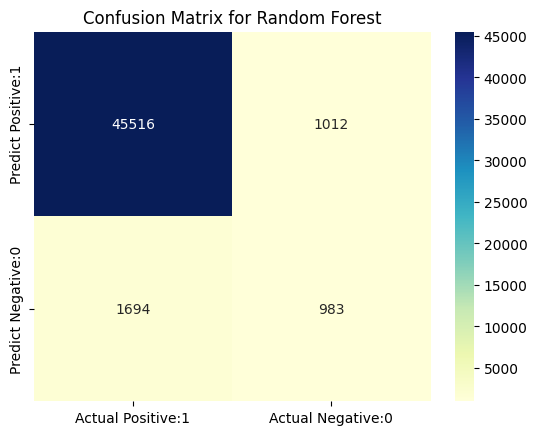

In [166]:
# visualize confusion matrix with seaborn heatmap

rf_cm_matrix = pd.DataFrame(data=rf_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(rf_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Random Forest')
plt.show()

## K-Fold cross validation

In [271]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

total_rf = 0
count = 0

for i in range(0, 30):
    scores_rf = cross_val_score(rf, X_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i), scoring='accuracy')
    print('\nCross-validation scores:{}'.format(scores_rf))
    total_rf += scores_rf
    count += 1


Cross-validation scores:[0.98853416 0.98814003 0.98874915 0.98928661 0.98982407 0.98968075
 0.98842667 0.98817586 0.98942955 0.98860542]

Cross-validation scores:[0.98903579 0.98885664 0.98975241 0.98803253 0.98935827 0.9893941
 0.98960909 0.98946576 0.98856959 0.98871291]

Cross-validation scores:[0.98867749 0.98889247 0.98917912 0.98914329 0.98857    0.98950159
 0.98907163 0.98957326 0.98774545 0.98910707]

Cross-validation scores:[0.98792504 0.98849833 0.98975241 0.98953743 0.98878498 0.9889283
 0.98921495 0.98842667 0.98989537 0.98882041]

Cross-validation scores:[0.99000322 0.98903579 0.98885664 0.98874915 0.98882081 0.98957326
 0.98835501 0.98989573 0.98846209 0.98821127]

Cross-validation scores:[0.98842667 0.98831918 0.98932244 0.98946576 0.98828335 0.98889247
 0.98925078 0.98910746 0.98946539 0.99025369]

Cross-validation scores:[0.98953743 0.98989573 0.9898599  0.98817586 0.98785338 0.98774589
 0.98806837 0.98885664 0.98942955 0.99025369]

Cross-validation scores:[0.98885664

In [272]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(total_rf.mean()/count))

Average cross-validation score: 0.9890


## Laporan Klasifikasi

In [273]:
print(metrics.classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97     46528
         Yes       0.49      0.37      0.42      2677

    accuracy                           0.95     49205
   macro avg       0.73      0.67      0.70     49205
weighted avg       0.94      0.95      0.94     49205



# Model 4: K-Nearest Neighbor

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [194]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 2]


In [195]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 90.18392439792704 % and k = [1, 2]


## Result Visualization

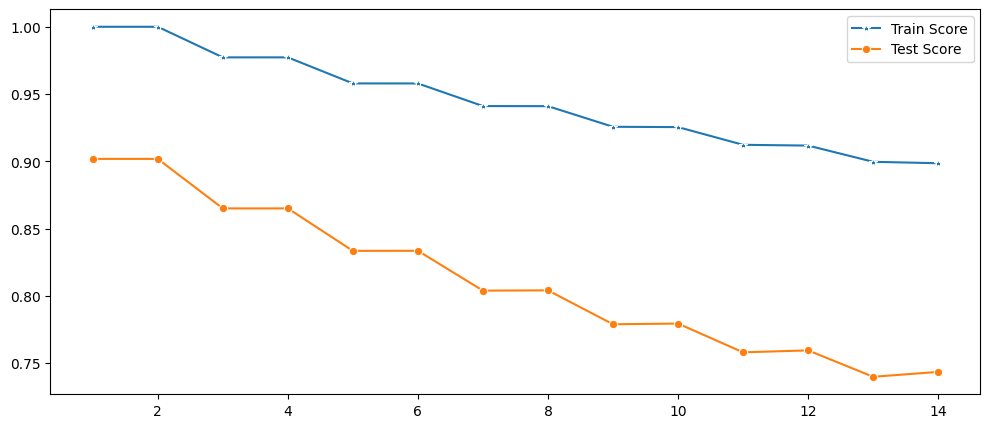

In [230]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')

The best result is captured at k = 1 & 2 hence 2 is used for the final model

In [231]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9018392439792704

In [189]:
# # instantiate the model
# knn = KNeighborsClassifier(n_neighbors=2)

In [190]:
# # for kNN, we need to scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

## Accuracy Score

In [232]:
# predict
knn_y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))

Accuracy: 0.9018392439792704


## Compare the train-set and test-set accuracy

In [233]:
knn_y_pred_train = knn.predict(X_train.values)
knn_y_pred_train

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [234]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, knn_y_pred_train))

Training-set accuracy score: 1.0


## Check for overfitting and underfitting

In [235]:
print('Training set score:', knn.score(X_train.values, y_train))
print('Test set score:', knn.score(X_test.values, y_test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training set score: 1.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test set score: 0.9018392439792704


The values are similar, but the test set score is still lower than the training set score.

## Compare KNN model accuracy with null accuracy

In [236]:
y_test.value_counts()

HadHeartAttack
No     46528
Yes     2677
Name: count, dtype: int64

In [237]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


## Confusion matrix

In [238]:
knn_cm = confusion_matrix(y_test, knn_y_pred)

print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) =', knn_cm[0,0])
print('True Negatives(TN) =', knn_cm[1,1])
print('False Positives(FP) =', knn_cm[0,1])
print('False Negatives(FN) =', knn_cm[1,0])

Confusion matrix

 [[43880  2648]
 [ 2182   495]]

True Positives(TP) = 43880
True Negatives(TN) = 495
False Positives(FP) = 2648
False Negatives(FN) = 2182


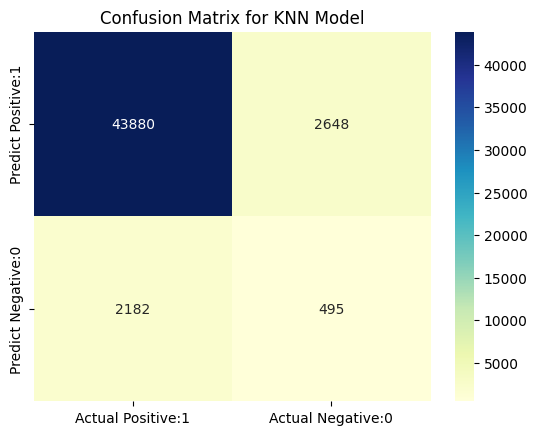

In [239]:
# visualize confusion matrix with seaborn heatmap

knn_cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(knn_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for KNN Model')
plt.show()

## K-Fold cross validation

In [274]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

total_knn = 0
count = 0

for i in range(0, 30):
    scores_knn = cross_val_score(knn, X_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i), scoring='accuracy')
    print('\nCross-validation scores:{}'.format(scores_knn))
    total_knn += scores_knn
    count += 1


Cross-validation scores:[0.97520513 0.97538428 0.97549178 0.97663836 0.97491849 0.97352109
 0.97452435 0.9747035  0.97409345 0.9754909 ]

Cross-validation scores:[0.97473933 0.97395106 0.97527679 0.97473933 0.97413021 0.97631588
 0.97585008 0.97524096 0.9763867  0.97488175]

Cross-validation scores:[0.97448852 0.97577842 0.97506181 0.97344942 0.97685334 0.97617256
 0.97473933 0.97463184 0.97491759 0.97387846]

Cross-validation scores:[0.97499015 0.97380773 0.97602924 0.97495432 0.97473933 0.97413021
 0.97778494 0.97552761 0.97545507 0.97412928]

Cross-validation scores:[0.97420187 0.97674585 0.97402272 0.97448852 0.97509764 0.97538428
 0.9761009  0.97599341 0.97445177 0.97567006]

Cross-validation scores:[0.97577842 0.97506181 0.97631588 0.97402272 0.97735498 0.97430936
 0.97459601 0.97671002 0.97466676 0.97588505]

Cross-validation scores:[0.97588591 0.97542012 0.97549178 0.97559927 0.97502598 0.97384356
 0.97524096 0.9756351  0.97481009 0.97452343]

Cross-validation scores:[0.975563

In [275]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(total_knn.mean()/count))

Average cross-validation score: 0.9752


## Laporan Klasifikasi

In [276]:
print(metrics.classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

          No       0.95      0.94      0.95     46528
         Yes       0.16      0.18      0.17      2677

    accuracy                           0.90     49205
   macro avg       0.56      0.56      0.56     49205
weighted avg       0.91      0.90      0.91     49205



# Model 5: Support Vector Machine

In [193]:
from sklearn.svm import SVC

In [196]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

## Accuracy Score

In [197]:
# predict
svm_y_pred = svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))

Accuracy: 0.8482064830809877


## Compare the train-set and test-set accuracy

In [198]:
svm_y_pred_train = svm.predict(X_train.values)
svm_y_pred_train

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [199]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, svm_y_pred_train))

Training-set accuracy score: 0.9050263716103881


## Check for overfitting and underfitting

In [200]:
print('Training set score:', svm.score(X_train.values, y_train))
print('Test set score:', svm.score(X_test.values, y_test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Training set score: 0.9050263716103881


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test set score: 0.8482064830809877


The values are similar, but the test set score is still lower than the training set score.

## Compare SVM model accuracy with null accuracy

In [201]:
y_test.value_counts()

HadHeartAttack
No     46528
Yes     2677
Name: count, dtype: int64

In [202]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


## Confusion Matrix

In [203]:
svm_cm = confusion_matrix(y_test, svm_y_pred)

print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) =', svm_cm[0,0])
print('True Negatives(TN) =', svm_cm[1,1])
print('False Positives(FP) =', svm_cm[0,1])
print('False Negatives(FN) =', svm_cm[1,0])

Confusion matrix

 [[40006  6522]
 [  947  1730]]

True Positives(TP) = 40006
True Negatives(TN) = 1730
False Positives(FP) = 6522
False Negatives(FN) = 947


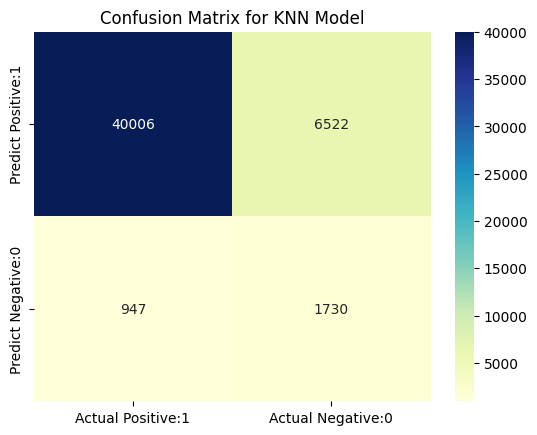

In [204]:
knn_cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(knn_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for KNN Model')
plt.show()

## K-Fold Cross Validation

In [ ]:
# Applying 10-Fold Cross Validation

total_svm = 0
count = 0

for i in range(0, 30):
    scores_svm = cross_val_score(svm, X_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i), scoring='accuracy')
    print('\nCross-validation scores:{}'.format(scores_svm))
    total_svm += scores_svm
    count += 1

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(total_svm.mean()/count))

## Laporan Klasifikasi

In [ ]:
print(metrics.classification_report(y_test, svm_y_pred))